# Machine Learning for PHP

Prediction of Thermal Resistance and Temperature Drop

In [2]:
# loading ml module
from ml_solution_module import MachineLearning

In [3]:
# assigning to variable and setting output path
ml = MachineLearning("data/")

data/ml_result already exists and ML reuslts will be stored here.


In [4]:
# preparing data and adding sample and FR informationto analysed data
# run this with different FR and Sample name (from experimenal data)
df_w_40 = ml.data_prep('data/di_water_exp/40_FR/gfe_combined.csv', sample='DI Water 40', fr=40)
df_w_60 = ml.data_prep('data/di_water_exp/60_FR/gfe_combined.csv', sample='DI Water 60', fr=60)
df_a_40 = ml.data_prep('data/al2o3_diwater_exp/40_FR/gfe_combined.csv', sample='Al2O3 DI Water 40', fr=40)
df_a_60 = ml.data_prep('data/al2o3_diwater_exp/60_FR/gfe_combined.csv', sample='Al2O3 DI Water 60', fr=60)

Compiled data stored at data/ml_result/all_combined_data_DI Water 40_40.csv
Compiled data stored at data/ml_result/all_combined_data_DI Water 60_60.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3 DI Water 40_40.csv
Compiled data stored at data/ml_result/all_combined_data_Al2O3 DI Water 60_60.csv


## Data Cleaning
by removing all positive value of dG (refer ml_solution.ipynb for raw data EDA)

In [5]:
df_a_40_clean = ml.data_filter_dG(df_a_40)
df_a_60_clean = ml.data_filter_dG(df_a_60)
df_w_40_clean = ml.data_filter_dG(df_w_40)
df_w_60_clean = ml.data_filter_dG(df_w_60)

In [6]:
# data compile
df = ml.data_compile()

All data compiled in a single csv file and saved at: data/ml_result as super_combined_data.csv


In [7]:
df_clean = ml.data_filter_dG(df)

## Exploratory Data Analysis

Data visualisation

## checking distrubution

<Axes: xlabel='dG[KJ/mol]', ylabel='Density'>

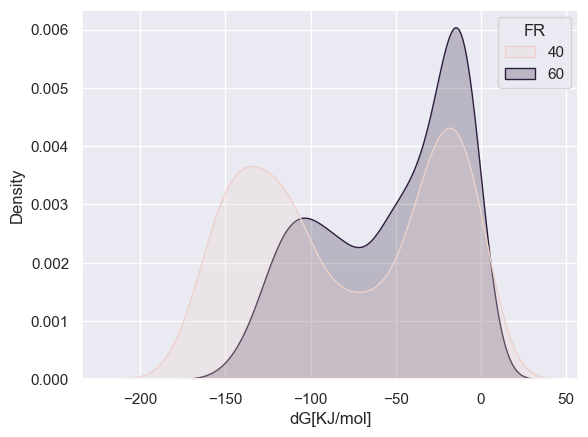

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(x=df_clean['dG[KJ/mol]'], hue=df['FR'], fill=True)

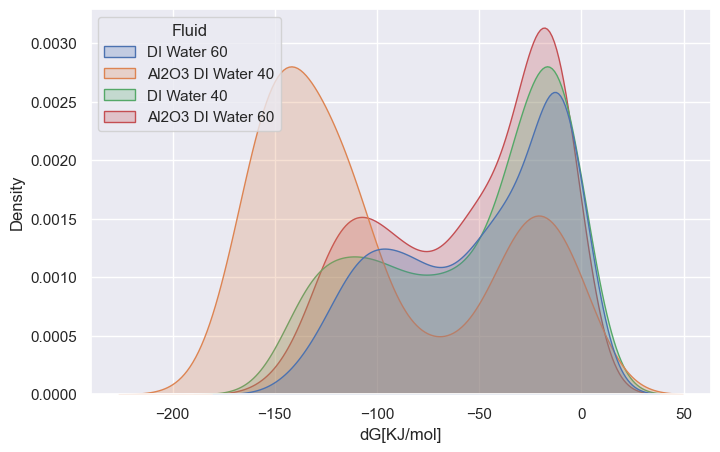

In [9]:
plt.figure(figsize=(8,5))
p = sns.kdeplot(x=df_clean['dG[KJ/mol]'], hue=df['Fluid'], fill=True)
sns.move_legend(p, loc='upper left')

<Axes: xlabel='TR[K/W]', ylabel='Density'>

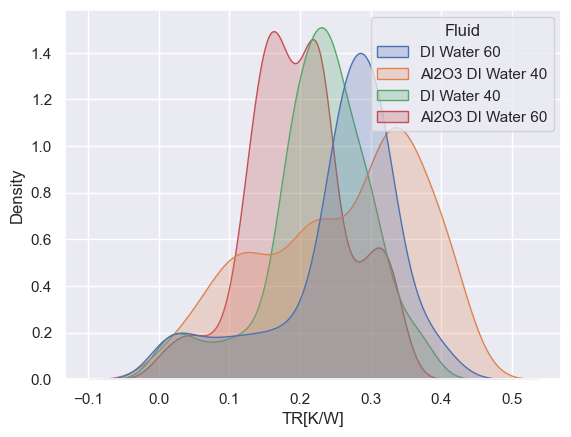

In [10]:
sns.kdeplot(x=df_clean['TR[K/W]'], hue=df['Fluid'], fill=True)

<Axes: xlabel='TR[K/W]', ylabel='dG[KJ/mol]'>

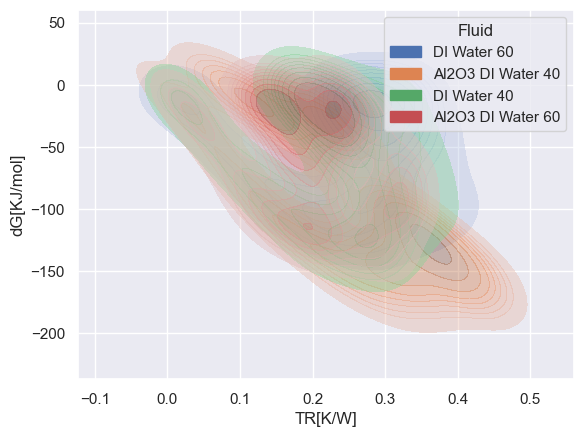

In [11]:
sns.kdeplot(x=df_clean['TR[K/W]'], y=df_clean['dG[KJ/mol]'], hue=df['Fluid'], fill=True, alpha=0.4)

<Axes: xlabel='TR[K/W]', ylabel='Density'>

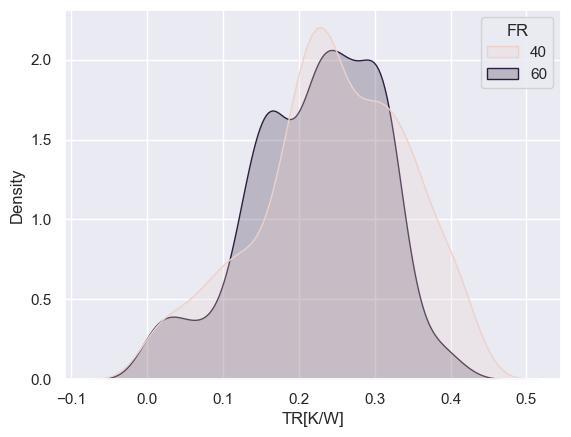

In [12]:
sns.kdeplot(x=df_clean['TR[K/W]'], hue=df['FR'], fill=True)

## Plotting Data

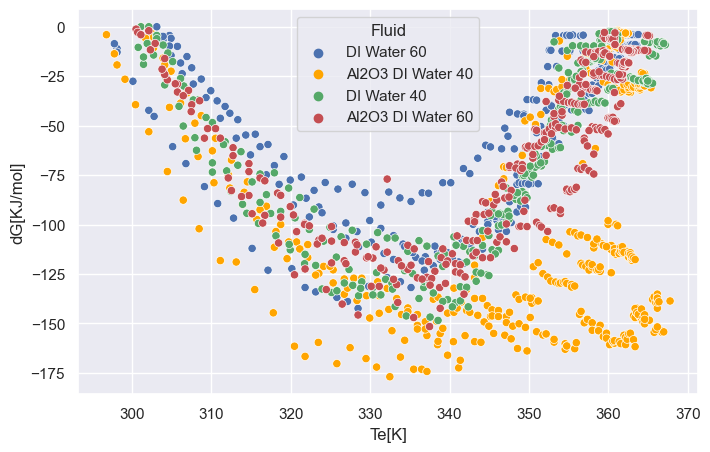

In [13]:
ml.etl_visual(df_clean,y_value='dG[KJ/mol]',hue='Fluid',point=['b', 'orange','g','r'])

<Axes: xlabel='Te[K]', ylabel='GFE [KJ/mol]'>

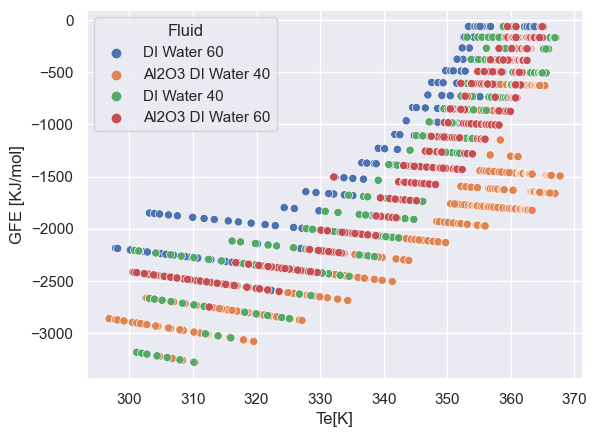

In [27]:
sns.scatterplot(x=df_clean['Te[K]'], y=df_clean['GFE [KJ/mol]'], hue=df_clean['Fluid'])

<Axes: xlabel='Te[K]', ylabel='GFE_Tc [KJ/mol]'>

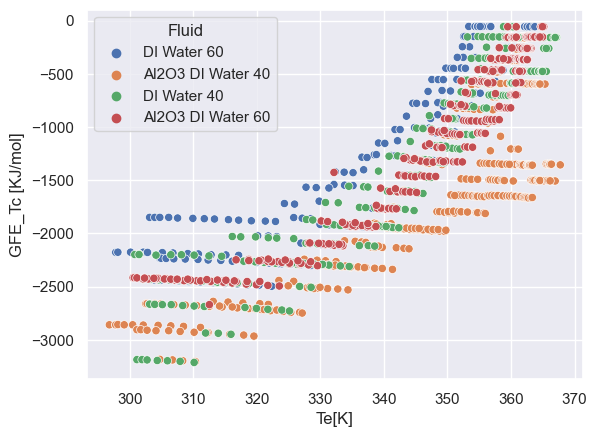

In [28]:
sns.scatterplot(x=df_clean['Te[K]'], y=df_clean['GFE_Tc [KJ/mol]'], hue=df_clean['Fluid'])

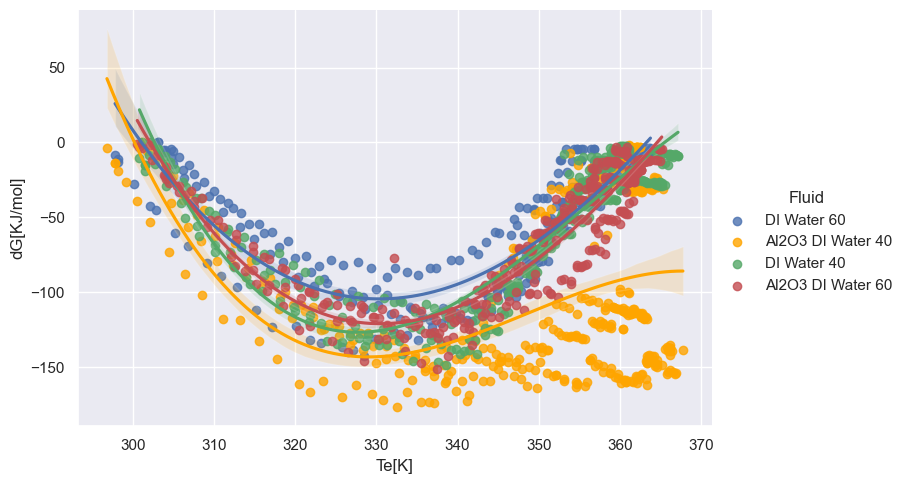

In [14]:
sns.lmplot(x='Te[K]', y='dG[KJ/mol]', data=df_clean, order=3, aspect=1.5, hue='Fluid', palette=['b','orange', 'g', 'r'])

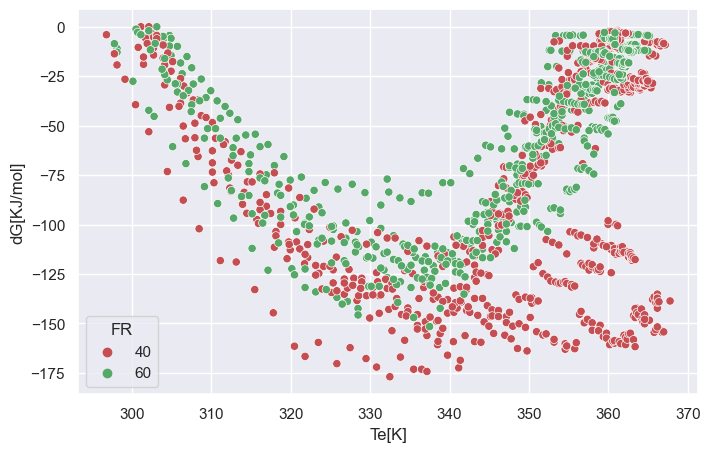

In [15]:
ml.etl_visual(df_clean,y_value='dG[KJ/mol]',hue='FR',point=['r', 'g'])

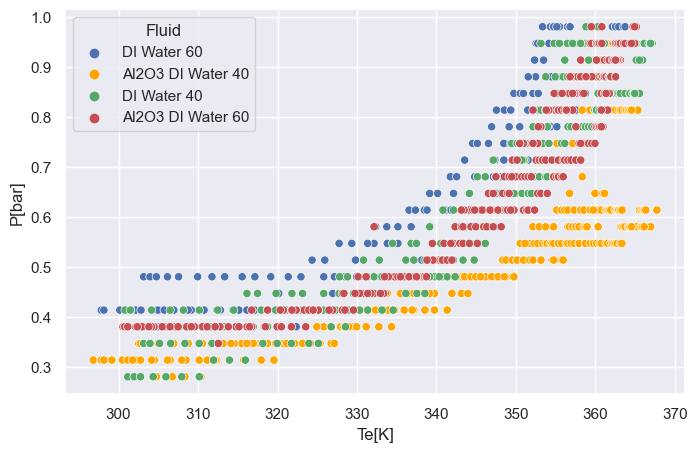

In [16]:
ml.etl_visual(df_clean,y_value='P[bar]',hue='Fluid',point=['b', 'orange','g','r'])

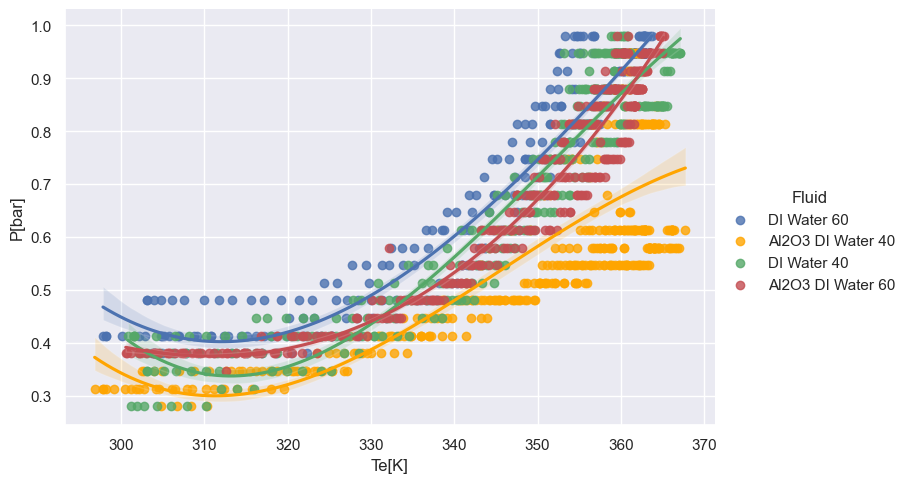

In [17]:
sns.lmplot(x='Te[K]', y='P[bar]', data=df_clean, order=3, aspect=1.5, hue='Fluid', palette=['b','orange', 'g', 'r'])

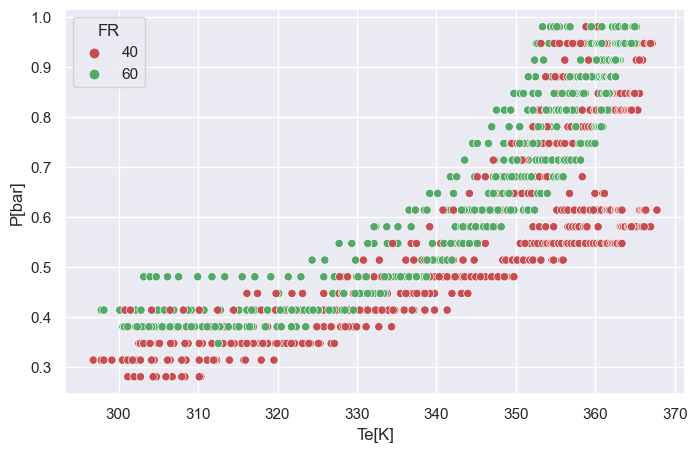

In [18]:
ml.etl_visual(df_clean,y_value='P[bar]',hue='FR',point=['r', 'g'])

## Combine comparision plotting

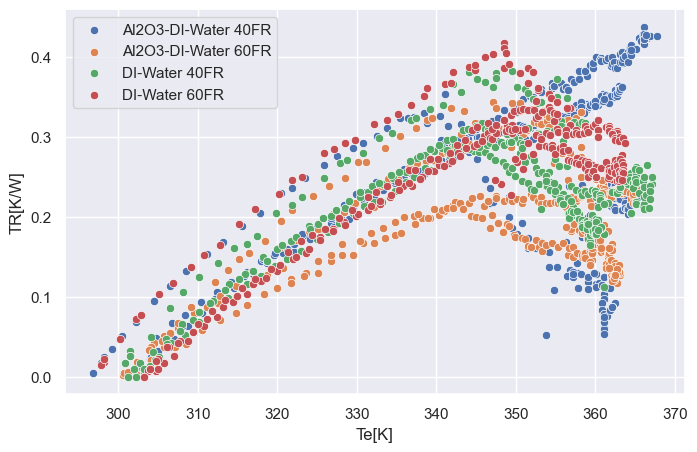

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting Thermal resistance
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['TR[K/W]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['TR[K/W]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['TR[K/W]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['TR[K/W]'], label='DI-Water 60FR')

plt.legend()

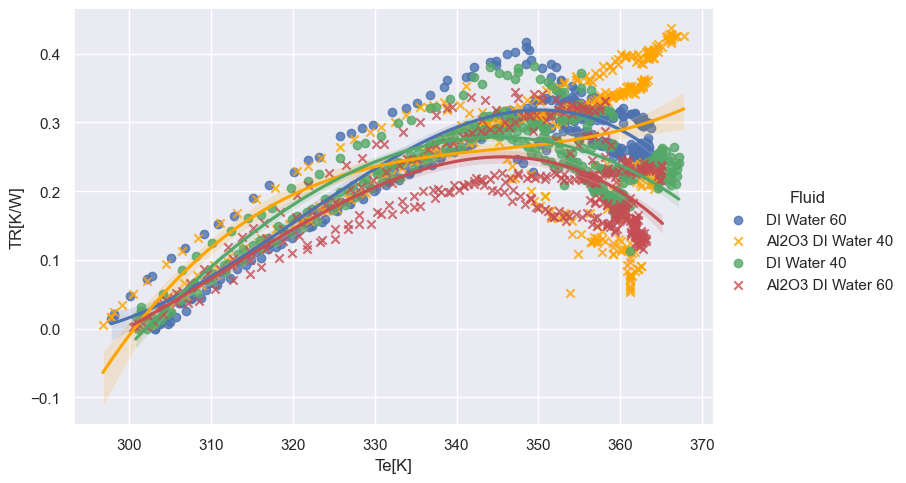

In [ ]:
sns.lmplot(x='Te[K]', y='TR[K/W]', data=df_clean, order=3, aspect=1.5, ci= 95, hue='Fluid', palette=['b','orange', 'g', 'r'], markers=['o','x','o','x',])

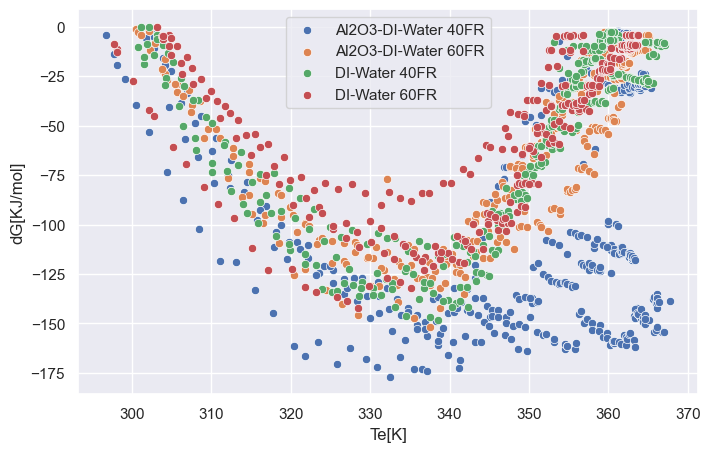

In [ ]:
# plotting dG
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['dG[KJ/mol]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['dG[KJ/mol]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['dG[KJ/mol]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['dG[KJ/mol]'], label='DI-Water 60FR')
plt.legend()

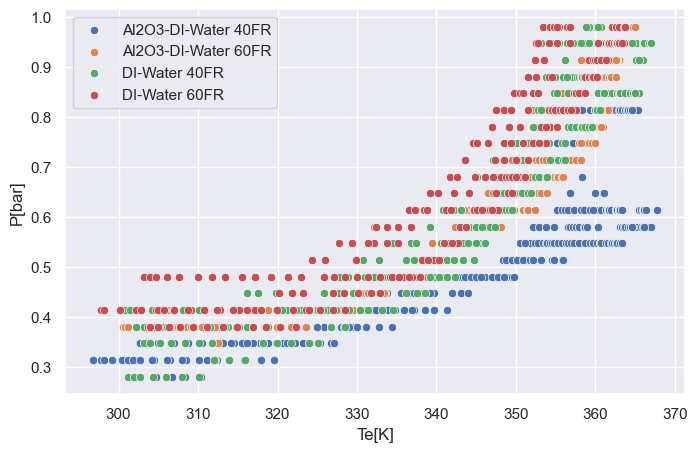

In [ ]:
# plotting pressure
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['P[bar]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['P[bar]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['P[bar]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['P[bar]'], label='DI-Water 60FR')
plt.legend()

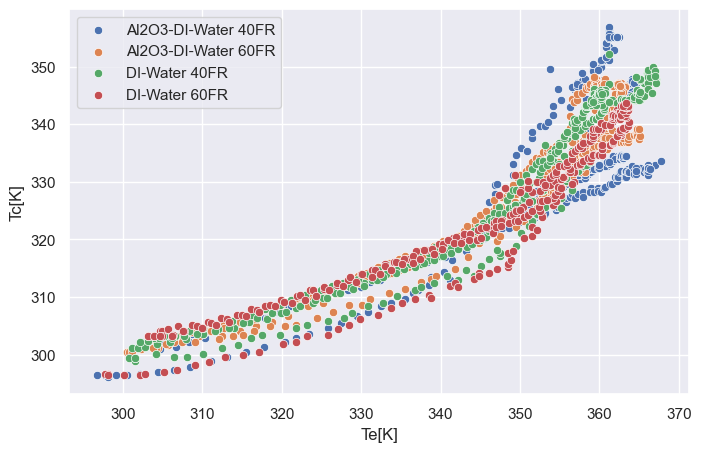

In [ ]:
# plotting Tc
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_a_40_clean['Te[K]'], y=df_a_40_clean['Tc[K]'], label='Al2O3-DI-Water 40FR')
sns.scatterplot(x=df_a_60_clean['Te[K]'], y=df_a_60_clean['Tc[K]'], label='Al2O3-DI-Water 60FR')
sns.scatterplot(x=df_w_40_clean['Te[K]'], y=df_w_40_clean['Tc[K]'], label='DI-Water 40FR')
sns.scatterplot(x=df_w_60_clean['Te[K]'], y=df_w_60_clean['Tc[K]'], label='DI-Water 60FR')
plt.legend()

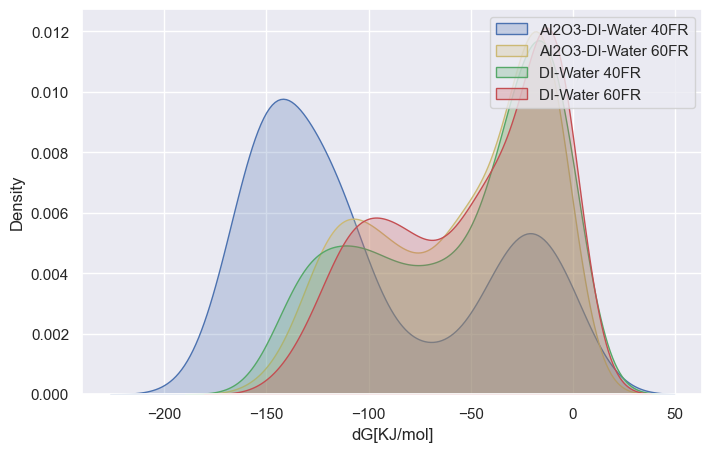

In [ ]:
# distrubution overlap for dG
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['dG[KJ/mol]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['dG[KJ/mol]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['dG[KJ/mol]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['dG[KJ/mol]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

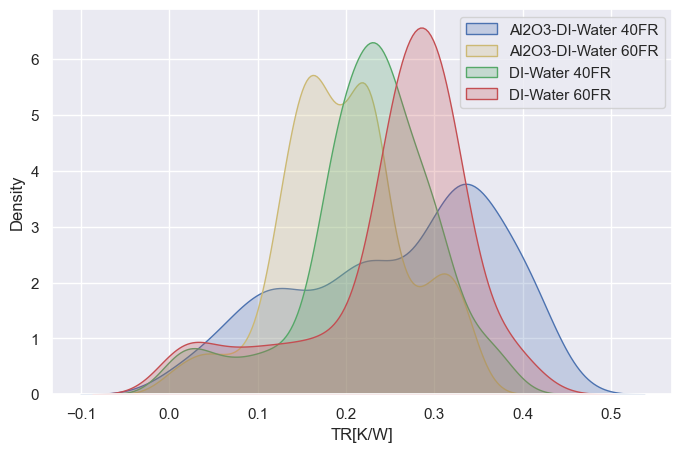

In [ ]:
# distrubution overlap for TR
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['TR[K/W]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['TR[K/W]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['TR[K/W]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['TR[K/W]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

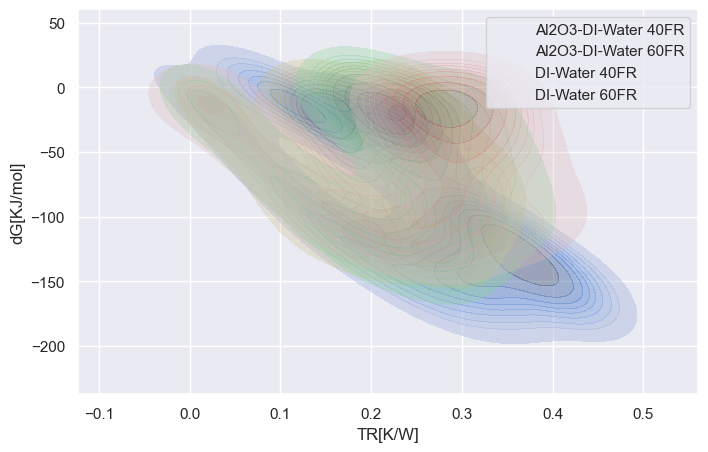

In [ ]:
# distrubution overlap for TR
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['TR[K/W]'], y=df_a_40_clean['dG[KJ/mol]'], fill=True, color='b', label='Al2O3-DI-Water 40FR', alpha=0.5)
sns.kdeplot(x=df_a_60_clean['TR[K/W]'], y=df_a_60_clean['dG[KJ/mol]'], fill=True, color='y', label='Al2O3-DI-Water 60FR', alpha=0.3)
sns.kdeplot(x=df_w_40_clean['TR[K/W]'], y=df_w_40_clean['dG[KJ/mol]'], fill=True, color='g', label='DI-Water 40FR', alpha=0.3)
sns.kdeplot(x=df_w_60_clean['TR[K/W]'], y=df_w_60_clean['dG[KJ/mol]'], fill=True, color='r', label='DI-Water 60FR', alpha=0.3)
plt.legend()

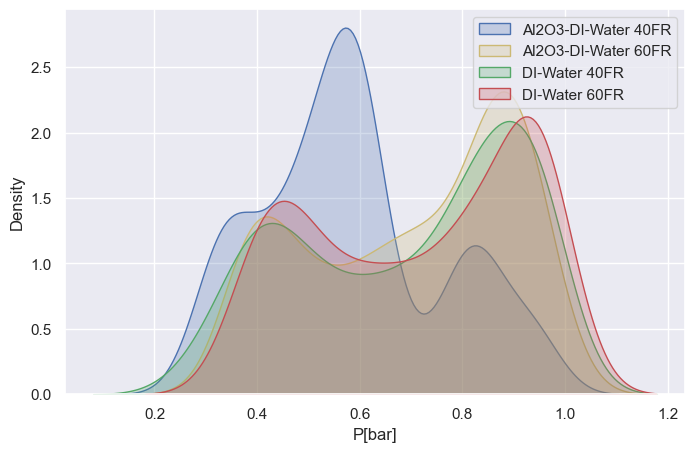

In [ ]:
# distrubution overlap for Pressure
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['P[bar]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['P[bar]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['P[bar]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['P[bar]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()

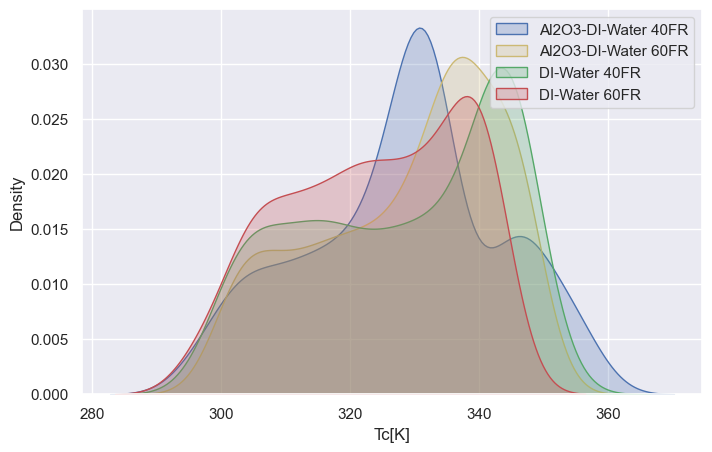

In [ ]:
# distrubution overlap Tc
plt.figure(figsize=(8,5))
sns.kdeplot(x=df_a_40_clean['Tc[K]'], fill=True, color='b', label='Al2O3-DI-Water 40FR')
sns.kdeplot(x=df_a_60_clean['Tc[K]'], fill=True, color='y', label='Al2O3-DI-Water 60FR')
sns.kdeplot(x=df_w_40_clean['Tc[K]'], fill=True, color='g', label='DI-Water 40FR')
sns.kdeplot(x=df_w_60_clean['Tc[K]'], fill=True, color='r', label='DI-Water 60FR')
plt.legend()